In [162]:
# Loading Train Dataset

titanic_train = pd.read_csv("F:/Study/Machine Learning/kaggle/Titanic/train.csv", keep_default_na= False, na_values= [""])
titanic_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [163]:
# Loading Test Dataset

titanic_test = pd.read_csv("F:/Study/Machine Learning/kaggle/Titanic/test.csv", keep_default_na= False, na_values= [""])
titanic_test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [164]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


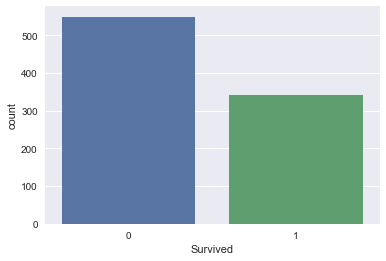

In [170]:
#Identifying Dependent Variable
titanic_train_y = titanic_train["Survived"]

# Visualizing the Survival Ratio amongst given Observations
sns.countplot(x=titanic_train_y)


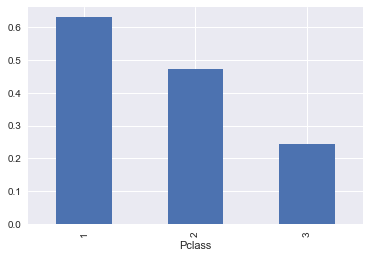

In [269]:
# Interesting observations

Pclass_grp = titanic_train.groupby("Pclass").mean()
Pclass_grp["Survived"].plot.bar()

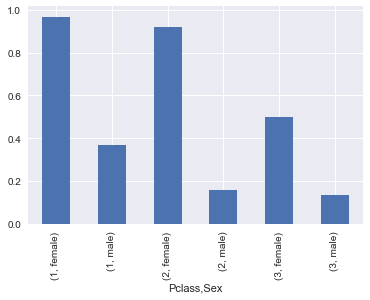

In [270]:
Pclass_sex_grp = titanic_train.groupby(["Pclass", "Sex"]).mean()
Pclass_sex_grp["Survived"].plot.bar()

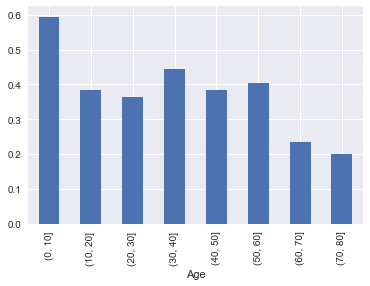

In [271]:
group_by_age = pd.cut(titanic_train["Age"], np.arange(0,90,10))
age_grp = titanic_train.groupby(group_by_age).mean()
age_grp["Survived"].plot.bar()

In [194]:
#Identifying Independent Variables

X = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Cabin", "Embarked"]  #Skipping - PassengerId, Name,Ticket
titanic_train_x = titanic_train[X]
titanic_train_x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [195]:
titanic_train_x.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [196]:
titanic_train_x = titanic_train_x.drop("Cabin", axis = 1)

In [197]:
titanic_train_x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


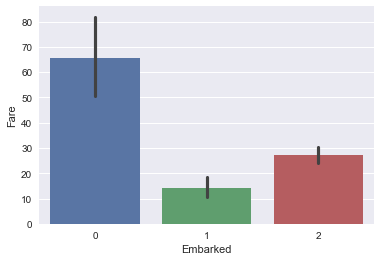

In [272]:
sns.barplot("Embarked","Fare", data = titanic_train_x)

#fare_grp = titanic_train_x.groupby("Embarked").mean()
#fare_grp["Fare"].hist()

In [212]:
titanic_train_x.Embarked[titanic_train_x.Embarked.isnull()] = "C"

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [214]:
titanic_prpr_x = titanic_train_x.copy()

le = preprocessing.LabelEncoder()
titanic_prpr_x.Sex = le.fit_transform(titanic_prpr_x.Sex)
titanic_prpr_x.Embarked = le.fit_transform(titanic_prpr_x.Embarked)  #Works only with no missing value

In [215]:
#cols = ["Pclass","Age","SibSp","Parch","Fare"]  #Imputer() works only on Numerical Variables
#titanic_train_x[cols]

from sklearn.preprocessing import Imputer
my_fit = Imputer()
titanic_prpr_x[cols] = my_fit.fit_transform(titanic_prpr_x[cols])

titanic_prpr_x.isnull().sum()

titanic_prpr_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Pclass      891 non-null float64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null float64
Parch       891 non-null float64
Fare        891 non-null float64
Embarked    891 non-null int64
dtypes: float64(5), int64(2)
memory usage: 48.8 KB


In [216]:
from sklearn.model_selection import train_test_split

titanic_train_x, titanic_trntest_x, titanic_train_y, titanic_trntest_y = train_test_split(titanic_prpr_x, titanic_train_y, random_state = 123)

In [223]:
import sklearn.tree

my_decisiontree = sklearn.tree.DecisionTreeClassifier(max_depth = 10)
my_decisiontree = my_decisiontree.fit(titanic_train_x, titanic_train_y)
#my_decisiontree_pred = my_randomforest.predict(titanic_train_x)
my_decisiontree.score(titanic_trntest_x, titanic_trntest_y)

0.7982062780269058

In [231]:
from sklearn.ensemble import RandomForestClassifier

my_randomforest = RandomForestClassifier(n_estimators = 100)
my_randomforest = my_randomforest.fit(titanic_train_x, titanic_train_y)
my_randomforest.score(titanic_trntest_x, titanic_trntest_y)

0.820627802690583

In [236]:
from sklearn.neighbors import KNeighborsClassifier

my_kn = KNeighborsClassifier(6)
my_kn = my_kn.fit(titanic_train_x, titanic_train_y)
my_kn.score(titanic_trntest_x, titanic_trntest_y)

0.73094170403587444

In [242]:
titanic_test["Survived"] = " "
titanic_test_y = titanic_test["Survived"]

titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Survived       418 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 39.3+ KB


In [248]:
cols = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
titanic_test_x = titanic_test[cols]

titanic_test_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        417 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 22.9+ KB


In [255]:
titanic_test_x[titanic_test_x.Fare.isnull()==True]

Em_grp = titanic_test_x.groupby("Embarked").mean()
Em_grp

titanic_test_x.Fare[titanic_test_x.Fare.isnull()==True] = 28.23

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\user\Anaconda3\lib\site-packages\pandas\core\generic.py:5233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2862: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [256]:
titanic_prpr_x = titanic_test_x.copy()

le = preprocessing.LabelEncoder()
titanic_prpr_x.Sex = le.fit_transform(titanic_prpr_x.Sex)
titanic_prpr_x.Embarked = le.fit_transform(titanic_prpr_x.Embarked)  #Works only with no missing value

In [258]:
my_fit = Imputer()
titanic_prpr_x[cols] = my_fit.fit_transform(titanic_prpr_x[cols])

titanic_prpr_x.isnull().sum()

titanic_prpr_x.info()

titanic_test_x = titanic_prpr_x.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null float64
Sex         418 non-null float64
Age         418 non-null float64
SibSp       418 non-null float64
Parch       418 non-null float64
Fare        418 non-null float64
Embarked    418 non-null float64
dtypes: float64(7)
memory usage: 22.9 KB


In [261]:
my_randomforest_pred = my_randomforest.predict(titanic_test_x)
my_randomforest_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0,

In [268]:
Survived = pd.DataFrame(data = my_randomforest_pred, columns= ["Survived"])
Survived = pd.concat([titanic_test["PassengerId"], Survived], axis = 1)

Survived.to_csv("Survived", index=False)